In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
#Load the California Housing Dataset
housing = fetch_california_housing(as_frame=True)
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
 #features (longitude, latitude, and median_income)
data_subset = data[['Longitude', 'Latitude', 'MedInc']]


In [11]:
#Apply K-Means Clustering (choosing 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_subset)

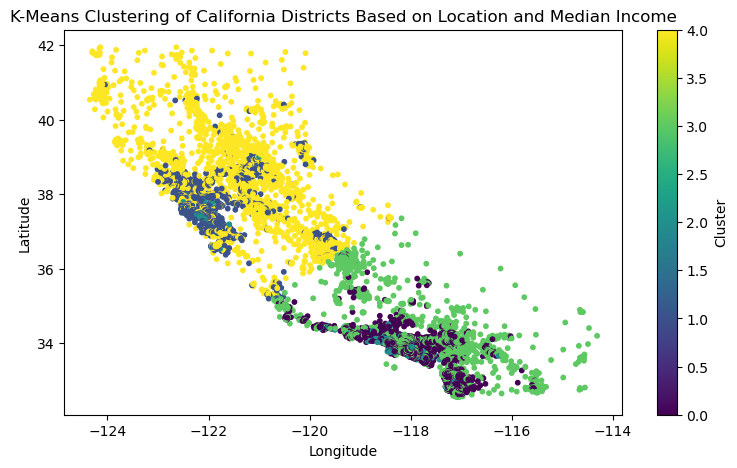

In [13]:
#Visualize the clusters (Plotting longitude vs latitude and color-coding by cluster)
plt.figure(figsize=(9, 5))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Districts Based on Location and Median Income')
plt.show()

Number of clusters: 2, Silhouette Score: 0.566509491976379
Number of clusters: 3, Silhouette Score: 0.5134953776441159
Number of clusters: 4, Silhouette Score: 0.4237838153559469
Number of clusters: 5, Silhouette Score: 0.37726223284399574
Number of clusters: 6, Silhouette Score: 0.3954599683853833
Number of clusters: 7, Silhouette Score: 0.3629079119139082
Number of clusters: 8, Silhouette Score: 0.3573070924373673
Number of clusters: 9, Silhouette Score: 0.341889341051214
Number of clusters: 10, Silhouette Score: 0.34761253198894965
Number of clusters: 11, Silhouette Score: 0.3570675810684109
Number of clusters: 12, Silhouette Score: 0.3500487264121008
The optimal number of clusters is: 2


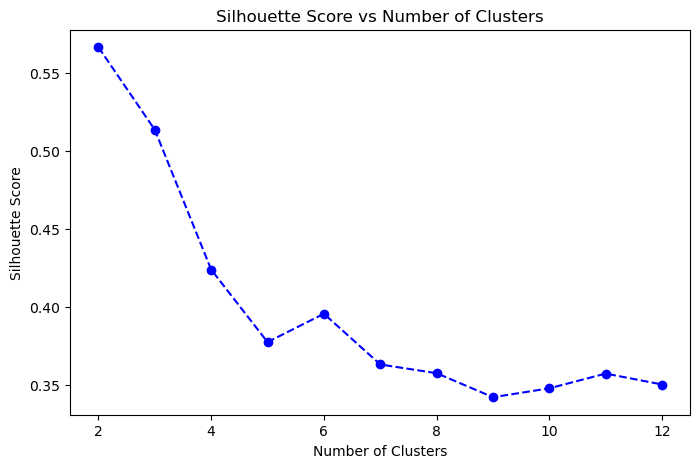

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Calculate Silhouette Score for cluster
silhouette_scores = []
cluster_range = list(range(2, 13))

#Calculating silhouette scores number of clusters using for loop
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_subset)
    
    
    score = silhouette_score(data_subset, cluster_labels)
    silhouette_scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

# Finding no.of clusters with the highest silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
#elbow method findings.

For n_clusters = 2, the inertia is 101042.11855364995
For n_clusters = 3, the inertia is 73398.28002142053
For n_clusters = 4, the inertia is 56518.62955035723
For n_clusters = 5, the inertia is 47180.532021305626
For n_clusters = 6, the inertia is 39492.01964347797
For n_clusters = 7, the inertia is 34709.366505800295
For n_clusters = 8, the inertia is 33403.629160539385
For n_clusters = 9, the inertia is 29729.921211466404
For n_clusters = 10, the inertia is 26473.1912379408
For n_clusters = 11, the inertia is 23981.73222735638


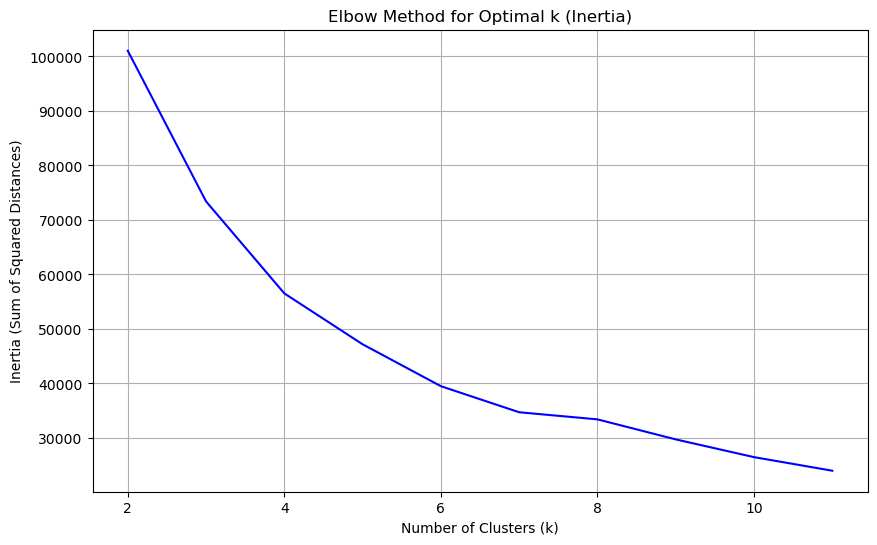

In [27]:
# Calculating the Inertia for different values of k
inertia_scores = []
k_values = list(range(2, 13))  # Trying k from 2 to 12

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_subset)

    inertia_scores.append(kmeans.inertia_)
    print(f'For n_clusters = {k}, the inertia is {kmeans.inertia_}')
    
# Plot the Elbow Method 
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_scores, color='blue', label='Inertia')
plt.title('Elbow Method for Optimal k (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [ ]:
#Kmeans clustering with latitude, longitude and median income(size) with k=2.

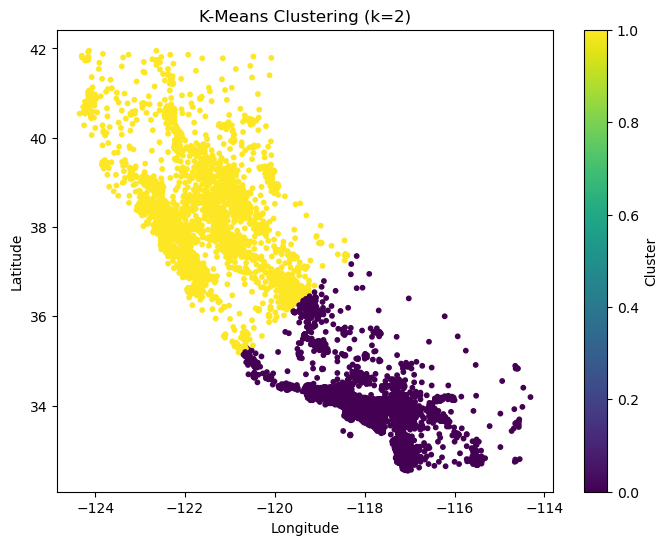

In [45]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Extract relevant features (longitude, latitude, and median_income)
data_subset = data[['Longitude', 'Latitude', 'MedInc']]

# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_subset)

# Plot clusters with k=2
plt.figure(figsize=(8, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=10)
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

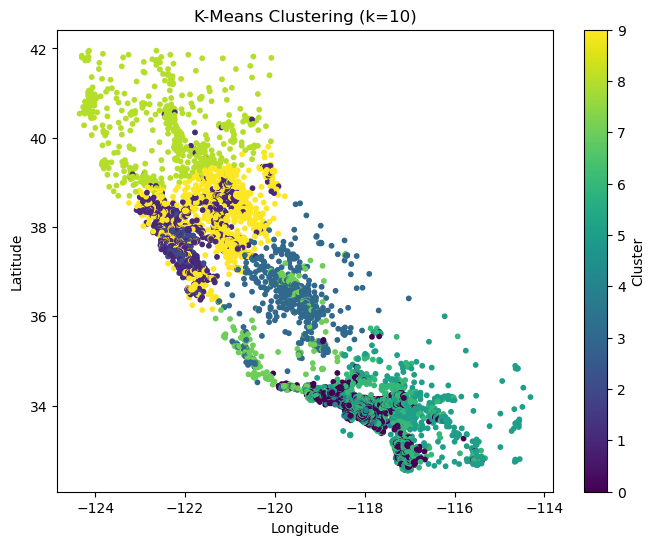

In [49]:
# Apply K-Means with k=10
kmeans = KMeans(n_clusters=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_subset)

# Plot clusters with k=10
plt.figure(figsize=(8, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=10)
plt.title('K-Means Clustering (k=10)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


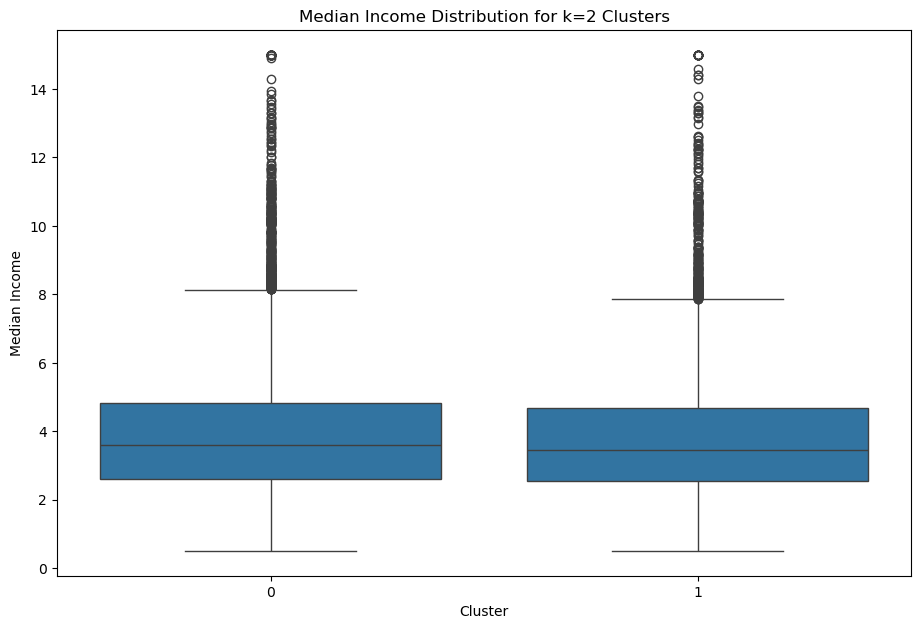

In [96]:

import seaborn as sns

#Function to perform KMeans clustering and add cluster labels to the dataset
def apply_kmeans(k, data_subset):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    return data

# Visualize the distribution of Median Income for k=2
k_value = [2]

plt.figure(figsize=(18, 12))  # Set figure size

for i, k in enumerate(k_value, 1):
    data = apply_kmeans(k, data_subset)
    
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y='MedInc', data=data)
    plt.title(f'Median Income Distribution for k={k} Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Median Income')

plt.tight_layout()
plt.show()

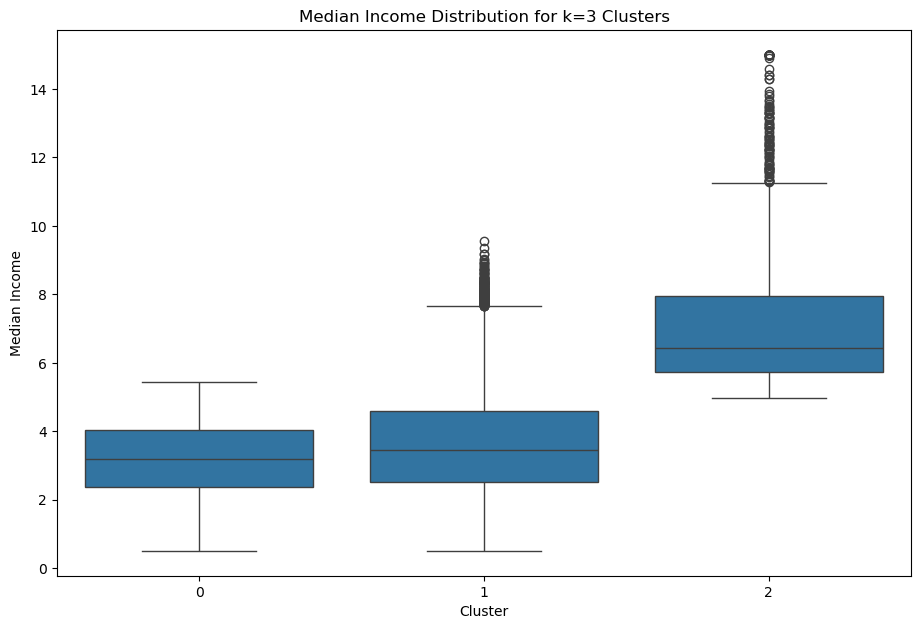

In [98]:

import seaborn as sns


def apply_kmeans(k, data_subset):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    return data


k_value = [3]

plt.figure(figsize=(18, 12))  # Set figure size

for i, k in enumerate(k_value, 1):
    data = apply_kmeans(k, data_subset)
    
    # Create a subplot for each k
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y='MedInc', data=data)
    plt.title(f'Median Income Distribution for k={k} Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Median Income')

plt.tight_layout()
plt.show()


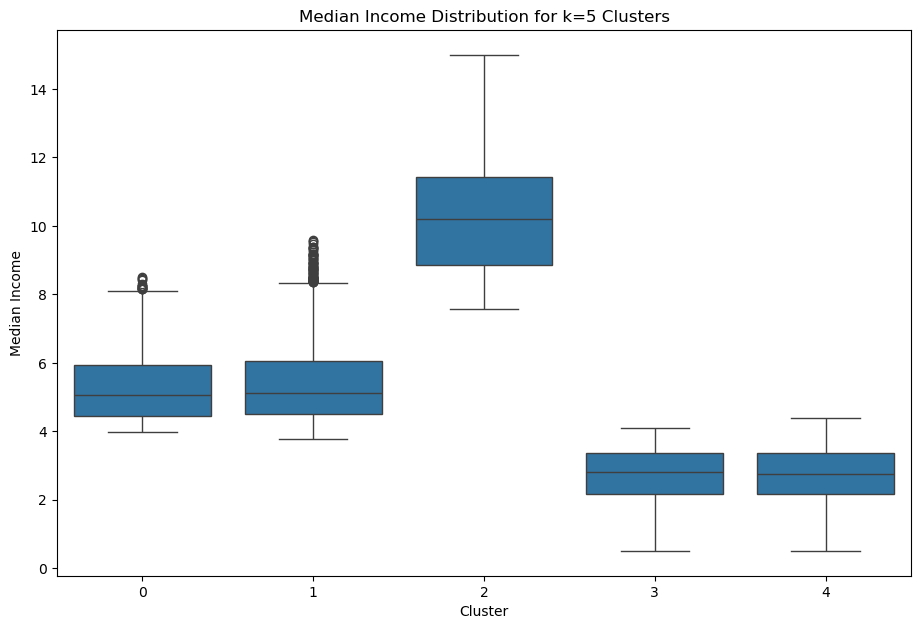

In [100]:

import seaborn as sns


def apply_kmeans(k, data_subset):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    return data


k_value = [5]

plt.figure(figsize=(18, 12))  # Set figure size

for i, k in enumerate(k_values, 1):
    data = apply_kmeans(k, data_subset)

    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y='MedInc', data=data)
    plt.title(f'Median Income Distribution for k={k} Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Median Income')

plt.tight_layout()
plt.show()


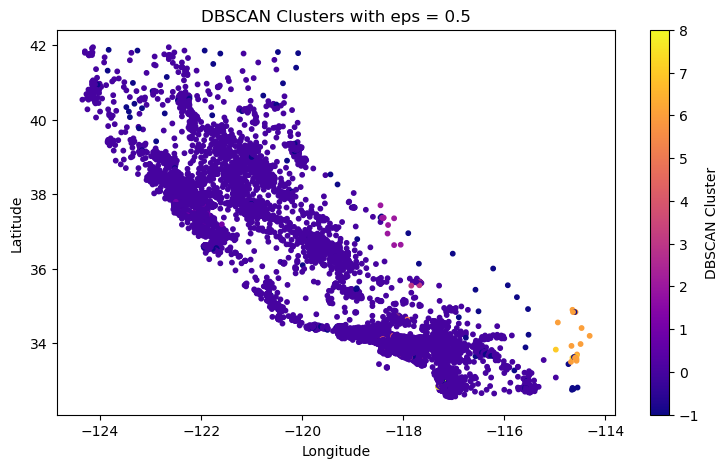

DBSCAN identified 10 clusters.


In [37]:
#DBSCAN cluster with eps = 0.5

from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5) 
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[['Longitude', 'Latitude', 'MedInc']])


plt.figure(figsize=(9, 5))
plt.scatter(data['Longitude'], data['Latitude'], c=data['DBSCAN_Cluster'], cmap='plasma', s=10)
plt.colorbar(label='DBSCAN Cluster')
plt.title('DBSCAN Clusters with eps = 0.5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


dbscan_clusters = len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'] else 0)  
print(f"DBSCAN identified {dbscan_clusters} clusters.")